In [1]:
import numpy as np
import pandas as pd

In [2]:
import nltk
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords

In [3]:
#reading product reviews on electronics category
e_data = pd.read_csv('review_files/electronics/amazon_electronics_reviews.csv')

In [4]:
#reading food products reviews
f_data = pd.read_csv('review_files/food/food_reviews.csv')

In [5]:
#drop null values in both the datasets
e_data.dropna(inplace=True)
f_data.dropna(inplace=True)

In [6]:
f_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
#Rating are in the range of 1 to 5, But Reviews with a score or rating of #3 adds no real value to finding the truth about the product
#So, reviews with rating of #3 are removed for the files.
#f_data = f_data[f_data['Score']!=3]
#e_data = e_data[e_data['Rating']!=3]
print('ok')

ok


In [8]:
f_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
#drop all the useless columns
e_data.drop('Product Name',inplace=True,axis=1)
e_data.drop('Brand Name',inplace=True,axis=1)
e_data.drop('Price',inplace=True,axis=1)
e_data.drop('Review Votes',inplace=True,axis=1)

f_data.drop('Id',inplace=True,axis=1)
f_data.drop('ProductId',inplace=True,axis=1)
f_data.drop('UserId',inplace=True,axis=1)
f_data.drop('ProfileName',inplace=True,axis=1)
f_data.drop('HelpfulnessNumerator',inplace=True,axis=1)
f_data.drop('HelpfulnessDenominator',inplace=True,axis=1)
f_data.drop('Time',inplace=True,axis=1)
f_data.drop('Summary',inplace=True,axis=1)

In [10]:
e_data = e_data.sample(frac=1).reset_index(drop=True)
f_data = f_data.sample(frac=1).reset_index(drop=True)

In [11]:
e_data = e_data.drop(e_data.index[200000:])
f_data = f_data.drop(f_data.index[200000:])

In [12]:
#################################################

In [13]:
#create a function which will normalized the review_text
def normalize_words(raw_txt):
    words = raw_txt.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [14]:
#applying the normalization function in e_data
e_data['clean_reviews'] = e_data['Reviews'].apply(normalize_words)

In [15]:
#applying the normalization function in f_data
f_data['clean_reviews'] = f_data['Text'].apply(normalize_words)

In [16]:
e_data.head()

,Rating,Reviews,clean_reviews
0,5,i was looking everywhere for this particular p...,"looking everywhere particular phone, one anywh..."
1,1,"Received this item covered in scratches, scuff...","received item covered scratches, scuff marks d..."
2,2,"Hello, I bought this cell phone as new and Im ...","hello, bought cell phone new im multiple batte..."
3,5,"Great protection, vivid color!","great protection, vivid color!"
4,5,great product,great product


In [17]:
f_data.head()

,Score,Text,clean_reviews
0,5,This is a ready to go (instant) ice tea powder...,ready go (instant) ice tea powder 2 cup pouche...
1,5,After trying many types of balls / objects wit...,"trying many types balls / objects treats, fina..."
2,1,This is one of the most spicy green peppercorn...,one spicy green peppercorns i've ever purchase...
3,5,Pacific Natural Foods' Organic Vegetable Broth...,pacific natural foods' organic vegetable broth...
4,1,This cider is pretty gross. I actually ordere...,cider pretty gross. actually ordered multiple ...


In [18]:
#Putting the features columns which we will need in different dataframe and is done for both
e_df = e_data[['clean_reviews','Rating']]
f_df = f_data[['clean_reviews','Score']]

In [19]:
#changing the column names to 'Reviews_text' and 'Rating' in both the dataframe
e_df.columns = ['Reviews_text','Rating']
f_df.columns = ['Reviews_text','Rating']

In [20]:
#combining or stacking the two dataframe together in one dataframe call clean_file
clean_file = f_df.append(e_df)

In [21]:
#now the data we have stack looks like this
clean_file.head()

,Reviews_text,Rating
0,ready go (instant) ice tea powder 2 cup pouche...,5
1,"trying many types balls / objects treats, fina...",5
2,one spicy green peppercorns i've ever purchase...,1
3,pacific natural foods' organic vegetable broth...,5
4,cider pretty gross. actually ordered multiple ...,1


In [22]:
len(clean_file)

400000

In [23]:
clean_data = pd.DataFrame()

In [24]:
#since the data we have right now need to be suffled to prevent learning issues
clean_data = clean_file.sample(frac=1).reset_index(drop=True)

In [25]:
#The clean data is now ready for classification and apply ML model
clean_data = clean_file[clean_file['Rating']!=3]

In [26]:
#Create a new column where reviews greater than #3 are given a score of 1 and less than #3 a score of 0
#Of course this is to simplify our understanding and not have to worry about all the review scores as a whole
clean_data['new_rate'] = np.where(clean_data['Rating']>3,1,0) #using the numpy where method

E:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
clean_data.head()

,Reviews_text,Rating,new_rate
0,ready go (instant) ice tea powder 2 cup pouche...,5,1
1,"trying many types balls / objects treats, fina...",5,1
2,one spicy green peppercorns i've ever purchase...,1,0
3,pacific natural foods' organic vegetable broth...,5,1
4,cider pretty gross. actually ordered multiple ...,1,0


In [28]:
#Time to split our data into training sets and test sets using our Reviews_text and Rating column
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(clean_data['Reviews_text'],clean_data['new_rate'],random_state=0)

In [29]:
X_train.shape

(277051,)

In [30]:
X_train[13]

13    shocked anyone would pay whopping 2.50 bottle ...
13    using phone month extreme conditions, dropped ...
Name: Reviews_text, dtype: object

In [31]:
#To convert bag of words with count vectorizer is used , which can be found in the scikit learn docs
#Convert the train data to vectorized data
from sklearn.feature_extraction.text import CountVectorizer
count_Vect = CountVectorizer()
count_Vect.fit(X_train)
count_Vect
X_train_vec_data = count_Vect.transform(X_train)

In [32]:
X_train_vec_data

<277051x90210 sparse matrix of type '<class 'numpy.int64'>'
	with 7412795 stored elements in Compressed Sparse Row format>

In [33]:
#Finally let's apply Logistic regression on the data and create our model
import time
begin = time.time()
model = LogisticRegression()
model.fit(X_train_vec_data,y_train)
time_lg = time.time()-begin
print(time_lg)

129.03117895126343


In [34]:
accuracy_lg = model.score(count_Vect.transform(X_test),y_test)
accuracy_lg

0.9323017617567758

In [35]:
#We can try another means to score our model using the AUC(Area under the curve) score
from sklearn.metrics import roc_auc_score
pred = model.predict(count_Vect.transform(X_test))
auc_lg=roc_auc_score(y_test,pred)
print('Score: ',auc_lg)

Score:  0.8758885869247257


In [36]:
model.predict(count_Vect.transform(['I will return this product. Worst product','elderly lab suffers arthritis. pain greatly diminished taking glucosamine chondroitin.']))

array([0, 1])

In [37]:
one_s = 0;
two_s = 0;
three_s = 0;
four_s = 0;
five_s = 0;

for i in clean_file['Rating']:
    if(i==1):
        one_s += 1;
    if(i==2):
        two_s += 1;
    if(i==3):
        three_s += 1;
    if(i==4):
        four_s += 1;
    if(i==5):
        five_s += 1;


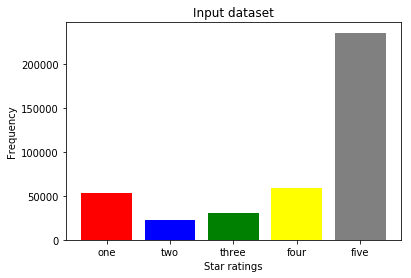

In [54]:

import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5] 
  
# heights of bars 
height = [one_s, two_s, three_s, four_s, five_s] 
  
# labels for bars 
tick_label = ['one', 'two', 'three', 'four', 'five'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red','blue','green','yellow','grey']) 
  
# naming the x-axis 
plt.xlabel('Star ratings') 
# naming the y-axis 
plt.ylabel('Frequency') 
# plot title 
plt.title('Input dataset') 
  
# function to show the plot 

plt.show() 

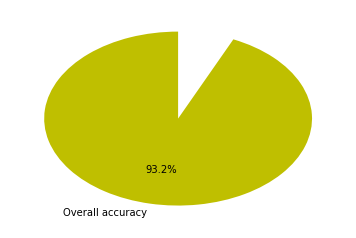

In [39]:
accuracy_output=[accuracy_lg]
activities = ['Overall accuracy']
colors = ['y']
plt.pie(accuracy_output, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [40]:
testing_data = pd.read_csv('test_file.csv')

In [41]:
testing_data

,Huawei Y9 2019 Reviews
0,It is regret to mentioned that as a launch off...
1,"Very very poor camera, kindly go for some othe..."
2,"Excellent buy, High on performance with Kirin ..."
3,Didn't receive the headphone that had promised...
4,"After all, after waiting for a long time, a go..."
5,I am not getting boAt rockerz Bluetooth headse...
6,"no headear phone with this pack,which is offer..."
7,Hiii... Phone is good. I just want to say thos...
8,Truly one of the best phone of the current tim...
9,Product is very good..but boat rockerz Bluetoo...


In [42]:
pos=0;
neg=0;

for i in testing_data['Huawei Y9 2019 Reviews']:
    if(model.predict(count_Vect.transform([i])==1)):
       pos+=1
    elif (model.predict(count_Vect.transform([i])==0)):
       neg+=1


E:\Software\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:214: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  ", try using != instead.", SparseEfficiencyWarning)


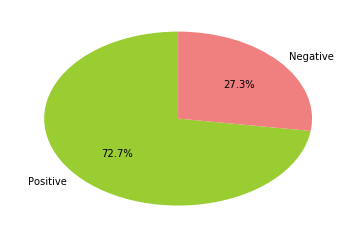

In [43]:

accuracy_output=[pos,neg]
activities = ['Positive','Negative']
colors = ['yellowgreen','lightcoral']
plt.pie(accuracy_output, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [44]:
#model.predict(count_Vect.transform(['','']))

In [45]:
#Finally let's apply SGD regression on the data and create our model
import time as tm
start =tm.time()
from sklearn.linear_model import SGDClassifier
#from sklearn.linear_model import cross_val_predict
SGD_model = SGDClassifier(max_iter = 1500,tol=0.0001)
SGD_model.fit(X_train_vec_data,y_train)
time_sgd = tm.time() - start
#print("time taken: %d"%(end))
time_sgd

2.5616092681884766

In [46]:
from sklearn.metrics import accuracy_score
pred = SGD_model.predict(count_Vect.transform(X_test))
accuracy_sgd = accuracy_score(y_test,pred)
print("Accuracy score:",accuracy_sgd)

Accuracy score: 0.9259672337061862


In [47]:
#We can try another means to score our model using the AUC(Area under the curve) score
import time
start = time.time()
from sklearn.metrics import roc_auc_score
pred = SGD_model.predict(count_Vect.transform(X_test))
auc_sgd = roc_auc_score(y_test,pred)
print('Score: ',auc_sgd)
duration = time.time() - start
print(duration)

Score:  0.8567492517738415
4.199410915374756


In [48]:
# NAIVE BAYES MODEL
st = time.time()
from sklearn.naive_bayes import MultinomialNB
pred = MultinomialNB()
pred.fit(X_train_vec_data,y_train)
time_nb = time.time()-st
time_nb

0.6437845230102539

In [49]:
accuracy_nb = pred.score(count_Vect.transform(X_test),y_test)
print("Classification rate: ",accuracy_nb)

Classification rate:  0.8894976773397147


In [50]:
import time
start = time.time()
from sklearn.metrics import roc_auc_score
pre1 = pred.predict(count_Vect.transform(X_test))
auc_nb = roc_auc_score(y_test,pre1)
print('Score: ',auc_nb)
duration = time.time() - start


Score:  0.8261975891931875


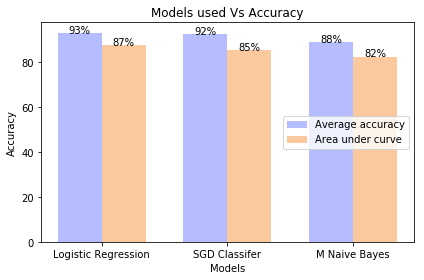

In [51]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 3

Avg_acu = (accuracy_lg*100,accuracy_sgd*100, accuracy_nb*100)
Auc_val = (auc_lg*100, auc_sgd*100, auc_nb*100)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, Avg_acu, bar_width, color='#a3acff', 
    label='Average accuracy', alpha= 0.8)
rects2 = plt.bar(index + bar_width, Auc_val, bar_width, color='#f9bc86', 
    label='Area under curve', alpha= 0.8)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models used Vs Accuracy')
plt.xticks(index + bar_width/2, ('Logistic Regression', 'SGD Classifer', 'M Naive Bayes'))
plt.legend(loc=5)

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

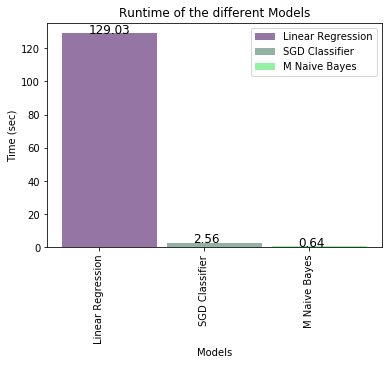

In [52]:
import matplotlib.pyplot as plt
# Create bars
barWidth = 0.9
bars1 = [round(time_lg, 2)]
bars2 = [round(time_sgd,2)]
bars3 = [round(time_nb,2)]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1]
r2 = [2]
r3 = [3]
r4 = r1 + r2 + r3
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Linear Regression')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='SGD Classifier')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='M Naive Bayes')
# Note: the barplot could be created easily. See the barplot section for other examples.

plt.xlabel('Models')
plt.ylabel('Time (sec)')
plt.title('Runtime of the different Models')
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ['Linear Regression', 'SGD Classifier', 'M Naive Bayes'], rotation=90)
 
# Create labels
label = [round(time_lg, 2), round(time_sgd,2), round(time_nb,2)]
 
# Text on the top of each barplot
for i in range(len(r4)):
    plt.text(x = r4[i]-0.2 , y = bars4[i]+0.1, s = label[i], size = 12)
    # Adjust the margin
    plt.subplots_adjust(bottom= 0.2, top = 0.98)
    
plt.show()

In [53]:
df = pd.DataFrame(
dict(Runtime=[round(time_lg, 2), round(time_sgd,2),round(time_nb,2)],
     Accuracy=[auc_lg*100,auc_sgd*100, auc_nb*100],
     Models=['Logistic Regression', 'SGD Classifer', 'M Naive Bayes']),
columns=['Models','Accuracy','Runtime'])
df = df.rename(columns = {"Runtime": "Runtime (sec)","Accuracy": "Accuracy (%)"})
df.style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
]
).hide_index()

Models,Accuracy (%),Runtime (sec)
Logistic Regression,87.5889,129.03
SGD Classifer,85.6749,2.56
M Naive Bayes,82.6198,0.64
